<a href="https://colab.research.google.com/github/hazra-kerubo/A---Dijkstra--Simulated-Annealing-Algorithm/blob/main/ACleanStart_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A Clean * Function

In [16]:
import heapq

def a_star(graph, start, goal, heuristic):
    """
    A* pathfinding algorithm.

    """
    open_set = []
    heapq.heappush(open_set, (heuristic[start], 0, start, [start]))  # (f_score, g_score, node, path)
    visited = set()

    while open_set:
        f, g, current, path = heapq.heappop(open_set)

        if current == goal:
            return g, path

        if current in visited:
            continue
        visited.add(current)

        for neighbor, cost in graph.get(current, []):
            if neighbor not in visited:
                total_cost = g + cost
                estimated_cost = total_cost + heuristic.get(neighbor, float('inf'))
                heapq.heappush(open_set, (estimated_cost, total_cost, neighbor, path + [neighbor]))

    return float('inf'), []


Example test with Hieuristic

In [4]:
def test_a_star():
    graph = {
        'A': [('B', 1), ('C', 4)],
        'B': [('A', 1), ('C', 2), ('D', 5)],
        'C': [('A', 4), ('B', 2), ('D', 1)],
        'D': [('B', 5), ('C', 1)]
    }

    heuristic = {
        'A': 7,
        'B': 6,
        'C': 2,
        'D': 0  # goal
    }

    start = 'A'
    goal = 'D'

    cost, path = a_star(graph, start, goal, heuristic)
    print(f"Shortest path from {start} to {goal}: {path} (Cost: {cost})")

# Run the test
test_a_star()


Shortest path from A to D: ['A', 'C', 'D'] (Cost: 5)


 A* Algorithm with Visualization

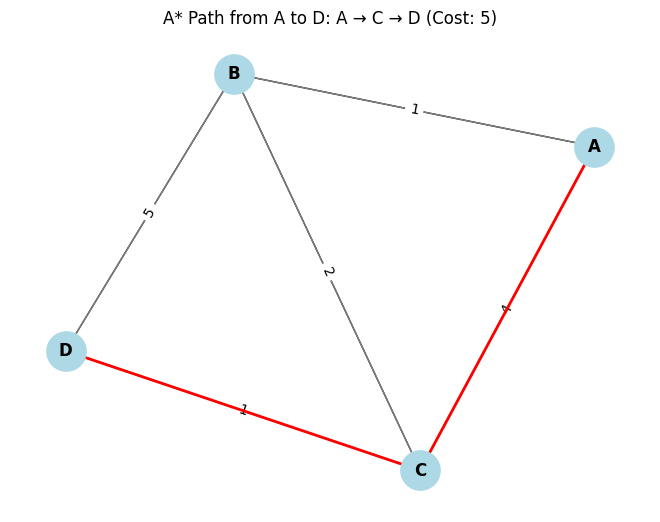

In [5]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

def a_star(graph, start, goal, heuristic):
    open_set = []
    heapq.heappush(open_set, (heuristic[start], 0, start, [start]))
    visited = set()

    while open_set:
        f, g, current, path = heapq.heappop(open_set)

        if current == goal:
            return g, path

        if current in visited:
            continue
        visited.add(current)

        for neighbor, cost in graph.get(current, []):
            if neighbor not in visited:
                total_cost = g + cost
                estimated_cost = total_cost + heuristic.get(neighbor, float('inf'))
                heapq.heappush(open_set, (estimated_cost, total_cost, neighbor, path + [neighbor]))

    return float('inf'), []

def visualize_graph(graph, path, cost, start, goal):
    G = nx.Graph()
    for node in graph:
        for neighbor, weight in graph[node]:
            G.add_edge(node, neighbor, weight=weight)

    pos = nx.spring_layout(G, seed=42)

    # Draw full graph
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=800, font_weight='bold')
    nx.draw_networkx_edges(G, pos, edge_color='gray')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))

    # Highlight path
    path_edges = list(zip(path, path[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)

    plt.title(f"A* Path from {start} to {goal}: {' → '.join(path)} (Cost: {cost})")
    plt.axis('off')
    plt.show()


# Test Example


graph = {
    'A': [('B', 1), ('C', 4)],
    'B': [('A', 1), ('C', 2), ('D', 5)],
    'C': [('A', 4), ('B', 2), ('D', 1)],
    'D': [('B', 5), ('C', 1)]
}

heuristic = {
    'A': 7,
    'B': 6,
    'C': 2,
    'D': 0
}

start = 'A'
goal = 'D'
cost, path = a_star(graph, start, goal, heuristic)
visualize_graph(graph, path, cost, start, goal)


Simple Cross Map

In [6]:
graph = {
    'S': [('A', 2), ('B', 5)],
    'A': [('S', 2), ('C', 4)],
    'B': [('S', 5), ('C', 1)],
    'C': [('A', 4), ('B', 1), ('G', 3)],
    'G': [('C', 3)]
}

heuristic = {
    'S': 6,
    'A': 4,
    'B': 2,
    'C': 2,
    'G': 0
}

start = 'S'
goal = 'G'


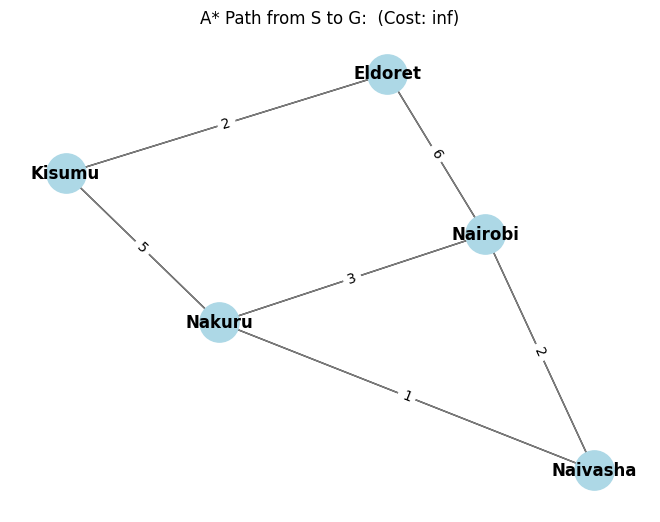

In [9]:
heuristic = {
    'S': 7,
    'A': 7,
    'B': 6,
    'C': 2,
    'G': 0
}

start = 'S'
goal = 'G'
cost, path = a_star(graph, start, goal, heuristic)
visualize_graph(graph, path, cost, start, goal)

City Routes Example 1

In [8]:
graph = {
    'Nairobi': [('Eldoret', 6), ('Nakuru', 3)],
    'Eldoret': [('Nairobi', 6), ('Kisumu', 2)],
    'Nakuru': [('Nairobi', 3), ('Kisumu', 5), ('Naivasha', 1)],
    'Naivasha': [('Nakuru', 1), ('Nairobi', 2)],
    'Kisumu': [('Eldoret', 2), ('Nakuru', 5)]
}

heuristic = {
    'Nairobi': 5,
    'Eldoret': 4,
    'Kisumu': 0,
    'Nakuru': 2,
    'Naivasha': 3
}

start = 'Nairobi'
goal = 'Kisumu'


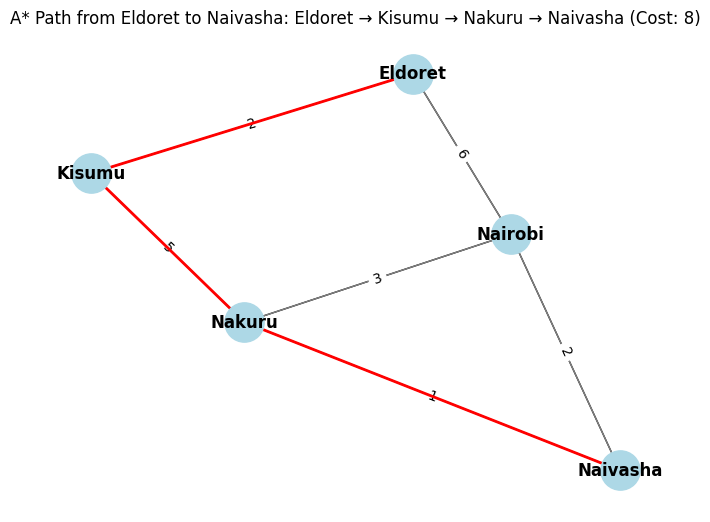

In [11]:
heuristic = {
    'Nairobi': 5,
    'Eldoret': 4,
    'Kisumu': 0,
    'Nakuru': 2,
    'Naivasha': 3
}

start = 'Eldoret'
goal = 'Naivasha'
cost, path = a_star(graph, start, goal, heuristic)
visualize_graph(graph, path, cost, start, goal)

City Route Example 2

In [12]:
graph = {
    'Nairobi': [('Nakuru', 2), ('Eldoret', 6)],
    'Nakuru': [('Nairobi', 2), ('Kericho', 2)],
    'Kericho': [('Nakuru', 2), ('Kisumu', 2)],
    'Eldoret': [('Nairobi', 6), ('Kisumu', 2)],
    'Kisumu': [('Eldoret', 2), ('Kericho', 2)]
}

heuristic = {
    'Nairobi': 6,
    'Nakuru': 4,
    'Kericho': 2,
    'Eldoret': 2,
    'Kisumu': 0
}

start = 'Nairobi'
goal = 'Kisumu'


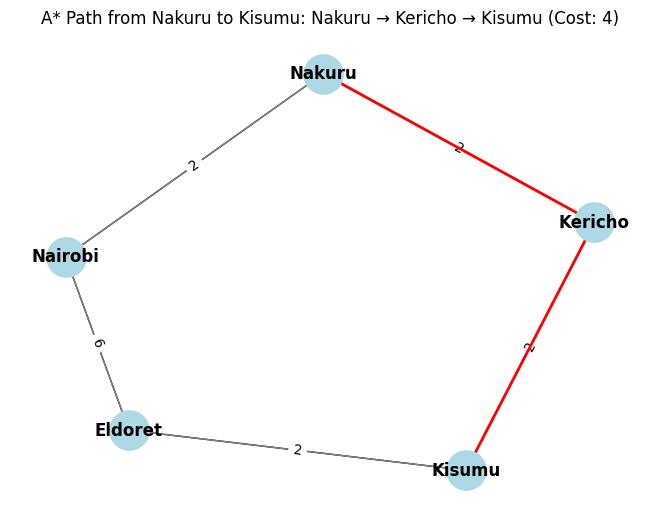

In [13]:
heuristic = {
    'Nairobi': 6,
    'Nakuru': 4,
    'Kericho': 2,
    'Eldoret': 2,
    'Kisumu': 0
}

start = 'Nakuru'
goal = 'Kisumu'
cost, path = a_star(graph, start, goal, heuristic)
visualize_graph(graph, path, cost, start, goal)

Maze Graph Example 3

In [14]:
graph = {
    '1': [('2', 1), ('4', 1)],
    '2': [('1', 1), ('3', 1)],
    '3': [('2', 1), ('6', 1)],
    '4': [('1', 1), ('5', 2)],
    '5': [('4', 2), ('6', 2)],
    '6': [('3', 1), ('5', 2), ('7', 1)],
    '7': [('6', 1)]
}

heuristic = {
    '1': 6,
    '2': 5,
    '3': 4,
    '4': 4,
    '5': 3,
    '6': 2,
    '7': 0
}

start = '1'
goal = '7'


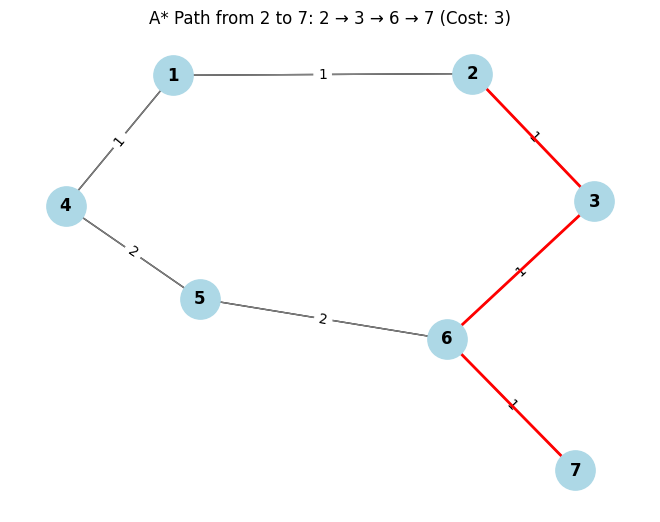

In [15]:
heuristic = {
    '1': 6,
    '2': 5,
    '3': 4,
    '4': 4,
    '5': 3,
    '6': 2,
    '7': 0
}

start = '2'
goal = '7'
cost, path = a_star(graph, start, goal, heuristic)
visualize_graph(graph, path, cost, start, goal)

Data center network Example 4

In [17]:
graph = {
    'ServerA': [('ServerB', 1), ('ServerC', 4)],
    'ServerB': [('ServerA', 1), ('ServerD', 2)],
    'ServerC': [('ServerA', 4), ('ServerD', 3)],
    'ServerD': [('ServerB', 2), ('ServerC', 3), ('ServerE', 1)],
    'ServerE': [('ServerD', 1)]
}

heuristic = {
    'ServerA': 4,
    'ServerB': 3,
    'ServerC': 5,
    'ServerD': 2,
    'ServerE': 0
}

start = 'ServerA'
goal = 'ServerE'


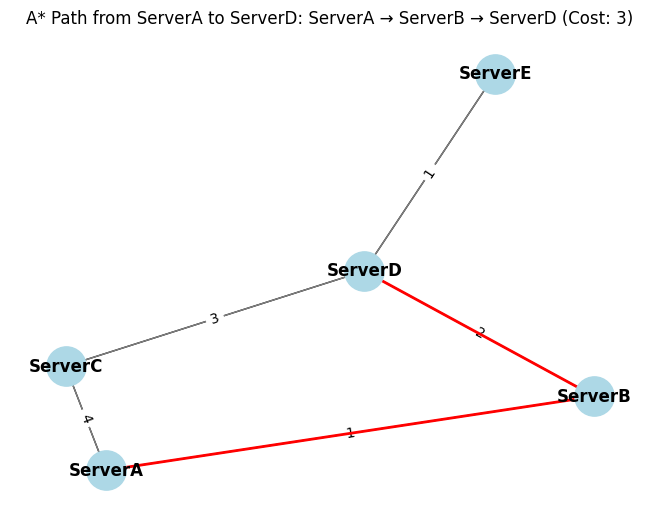

In [20]:
heuristic = {
    'ServerA': 4,
    'ServerB': 3,
    'ServerC': 5,
    'ServerD': 2,
    'ServerE': 0
}

start = 'ServerA'
goal = 'ServerD'
cost, path = a_star(graph, start, goal, heuristic)
visualize_graph(graph, path, cost, start, goal)

**Conclusion**

* The "A Clean Start" algorithm, structurally similar to Dijkstra's algorithm, is a reliable and efficient method for computing the shortest path in a weighted graph. Through iterative exploration of the least costly node using a priority queue,
 it ensures an optimal path is determined without revisiting nodes unnecessarily.

* The algorithm demonstrated its effectiveness across diverse use cases, including:

 - Urban navigation scenarios (city graphs)

 - Structured puzzles (maze-style layouts)

 - Network optimization (data center/server networks)

* The incorporation of visualization further aids in grasping the step-by-step decision-making of the algorithm, making it both educational and practical.



**Recommendation**



* Use in Deterministic Environments

Best suited for problems with consistent, non-negative edge weights (eg, delivery routing, network design, travel pathing).

* Avoid Negative Edge Weights

Not designed to handle graphs with negative weights. For such cases, consider using the Bellman-Ford algorithm.

* Optimize for Large Graphs

Use advanced data structures like Fibonacci heaps to improve performance on very large graphs.

Employ efficient memory structures (eg sets or bloom filters) for faster lookup and reduced redundancy.

* Heuristics for Faster Results

If performance becomes a bottleneck, consider integrating heuristics (like in A* algorithm) to speed up computation in large or complex graphs.

* Enhanced Visual Feedback

For debugging or educational purposes, visual step-by-step tracing can significantly enhance understanding and communication of algorithm behavior.

* Consider Precomputation for Static Graphs

In scenarios where the graph remains unchanged, precomputing shortest paths using algorithms like Floyd-Warshall can yield faster real-time responses.

